##  Problem Statement

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.
- You would like to expand your business to cities that may give your restaurant higher profits.
- The chain already has restaurants in various cities and you have data for profits and populations from the cities.
- You also have data on cities that are candidates for a new restaurant. 
    - For these cities, you have the city population.

## Goal
The goal of this project is to build a linear regression model to determine which city would give the highest profit.

With the model, I can add a new city's population and have the model estimate your restaurant's potential monthly profits for that city.

### Reference
This project was done thanks to "Supervised Machine Learning" course on Coursera by Andrew ng (DeepLearning.AI), which I took.

Understanding of the manual application of Linear regression using cost function and gradient descent.

In [1]:
# Importing required Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import math

In [2]:
header = ['Population', 'Profit']

In [3]:
data = pd.read_csv('dataset/restaurant.csv', sep = ';', names=header)
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.shape

(97, 2)

In [5]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [6]:
# Check for missing values
print(f'Missing values in data: \n {data.isnull().sum()}')

Missing values in data: 
 Population    0
Profit        0
dtype: int64


In [7]:
# Check for duplicate
print(f'Duplicates in data is {data.duplicated().sum()}')

Duplicates in data is 0


No misssing and no duplicates values

In [8]:
# Seperate the data into x_train and y_train
# assign population to x_train and profit to y_train
x_train = data['Population']
y_train = data['Profit']

In [9]:
# view x_train shape
print(f"x_train shape is: {x_train.shape}\n")
print(x_train[:6])

x_train shape is: (97,)

0    6.1101
1    5.5277
2    8.5186
3    7.0032
4    5.8598
5    8.3829
Name: Population, dtype: float64


In [10]:
# view x_train shape
print(f"y_train shape is: {y_train.shape}\n")
print(y_train[:6])

y_train shape is: (97,)

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
5    11.8860
Name: Profit, dtype: float64


### Visualize the data

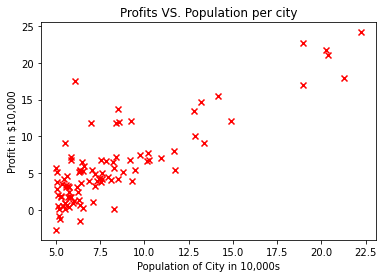

In [11]:
plt.scatter(x_train, y_train, marker='x', c='r')
# set the title
plt.title("Profits VS. Population per city")
# set the y-axis label
plt.ylabel('Profit in $10,000')
# set the x-axis label
plt.xlabel('Population of City in 10,000s')
plt.show()

## Model prediction

- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is representented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

This is the equation for a line, with an intercept $b$ and a slope $w$

<a name="ex01"></a>
### Cost function

First compute the cost function; The cost function (J) tries to reduce the errors as much as possible

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The cost for that example  $$cost^{(i)} =  (f_{wb} - y^{(i)})^2$$
    

* Return the total cost over all examples
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator



In [12]:
# Compute the cost function
def compute_cost(x, y, w, b):
    m = x.shape[0] # m is the number of training examples
    total_cost = 0
    cost_sum = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
        total_cost = (1 / (2 * m)) * cost_sum
        
    return total_cost

In [13]:
# Compute cost with some initial values for parameters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(cost)

75.20338497891959


### Gradient descent

The gradient descent is an algorithm for finding the parameters w & b that minimizes the cost function J.

The compute_gradient function does the following:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The gradient for the parameters $w, b$ from that example 
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)}) 
        $$
        $$
        \frac{\partial J(w,b)}{\partial w}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} 
        $$
    

* Return the total gradient update from all the examples
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial w}^{(i)} 
    $$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator


In [14]:
def compute_gradient(x, y, w, b):
    m = x.shape[0] # number of training examples
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [15]:
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (0): ', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (0):  -65.32884974555672 -5.83913505154639


In [16]:
# Compute and display cost and gradient with non-zero w and b
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)
print('Gradient at w, b: ', tmp_dj_dw, tmp_dj_db)

Gradient at w, b:  -47.41610118114435 -4.007175051546391


### 2.6 Learning parameters using batch gradient descent 

The optimal parameters of a linear regression model is found by using batch gradient descent. 
Batch refers to running all the examples in one iteration.

In [17]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        
        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b)
        
        # Update parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Save cost J at each iteration
        if i<100000:
            cost = cost_function(x, y, w, b)
            J_history.append(cost)
            
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f} ")
            
    return w, b, J_history, w_history

Using the dataset above to run the batch gradient descent

In [18]:
initial_w = 0
initial_b = 0

# some gradient descent values
iterations = 150
alpha = 0.01


w,b,_,_ = gradient_descent(x_train, y_train, initial_w, initial_b, compute_cost,
                          compute_gradient, alpha, iterations)
print("w,b found by gradient descent: ", w, b)

Iteration    0: Cost     6.74 
Iteration   15: Cost     5.84 
Iteration   30: Cost     5.76 
Iteration   45: Cost     5.70 
Iteration   60: Cost     5.63 
Iteration   75: Cost     5.57 
Iteration   90: Cost     5.51 
Iteration  105: Cost     5.46 
Iteration  120: Cost     5.41 
Iteration  135: Cost     5.36 
w,b found by gradient descent:  0.8883456872246002 -0.8628783435013853


We will now use the final parameters from gradient descent to plot the linear fit. 

Recall that we can get the prediction for a single example $f(x^{(i)})= wx^{(i)}+b$. 

To calculate the predictions on the entire dataset, we can loop through all the training examples and calculate the prediction for each example. This is shown in the code block below.

In [19]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Plot the predicted value

Text(0.5, 0, 'Population of City in 10,000s')

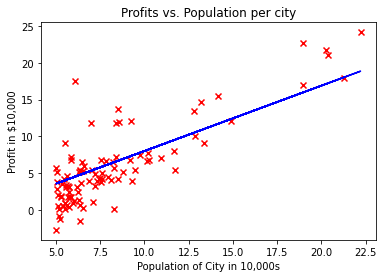

In [20]:
# The predicted values plot

plt.plot(x_train, predicted, c="b") # plot the linear fit

# Scatter plot of the data
plt.scatter(x_train, y_train, marker='x', c='r')

# Set the title
plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000') # the y label
plt.xlabel('Population of City in 10,000s') # x label

The final values of $w,b$ can also be used to make predictions on profits. Let's predict what the profit would be in areas of 35,000 and 70,000 people. 

- The model takes in population of a city in 10,000s as input. 

- Therefore, 35,000 people can be translated into an input to the model as `np.array([3.5])`

- Similarly, 70,000 people can be translated into an input to the model as `np.array([7.])`

In [21]:
predict_1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f\n' % (predict_1*10000))

predict_2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict_2*10000))

For population = 35,000, we predict a profit of $22463.32

For population = 70,000, we predict a profit of $53555.41


In [22]:
# Trying with population of 55,000
predict_1 = 5.5 * w + b
print('For population = 55,000, we predict a profit of $%.2f\n' % (predict_1*10000))

# Trying with population of 90,000
predict_2 = 9.0 * w + b
print('For population = 90,000, we predict a profit of $%.2f' % (predict_2*10000))

For population = 55,000, we predict a profit of $40230.23

For population = 90,000, we predict a profit of $71322.33


In [23]:
# Save the model
import pickle

In [24]:
data = {
    "model": predicted,
    "Population": x_train
}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [26]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
    
predicted_loaded = data["model"]
population = data["Population"]

In [27]:
predict_2 = 9.0 * w + b
print('For population = 90,000, we predict a profit of $%.2f' % (predict_2*10000))

For population = 90,000, we predict a profit of $71322.33
